In [8]:
import torch
from transformers import BertTokenizer, BertModel


def get_word_embeddings(words, model_name='dmis-lab/biobert-base-cased-v1.1'):
    tokenizer = BertTokenizer.from_pretrained(model_name)
    model = BertModel.from_pretrained(model_name)

    model.eval()
    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    model.to(device)

    word_embeddings = {}

    with torch.no_grad():
        for word in words:
            # Tokenize and obtain output from BERT
            inputs = tokenizer(word, return_tensors="pt", padding=True, truncation=True).to(device)
            outputs = model(**inputs)
            # Get the embeddings of the [CLS] token which can represent the word
            embed = outputs.last_hidden_state[:, 0, :].squeeze().cpu().numpy()
            word_embeddings[word] = embed

    return word_embeddings


In [9]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
import umap
import matplotlib.pyplot as plt


def plot_embeddings(embeddings, method="PCA"):
    words, vectors = zip(*embeddings.items())
    vectors = np.array(vectors)

    if method == "PCA":
        reducer = PCA(n_components=2)
    elif method == "t-SNE":
        reducer = TSNE(n_components=2, random_state=42, perplexity=30, n_iter=300)
    elif method == "UMAP":
        reducer = umap.UMAP()
    else:
        raise ValueError("Method not recognized: Choose from 'PCA', 't-SNE', or 'UMAP'")

    reduced_vectors = reducer.fit_transform(vectors)
    
    plt.figure(figsize=(12, 8))
    plt.scatter(reduced_vectors[:, 0], reduced_vectors[:, 1], s=5)
    plt.title(f"{method} visualization of word embeddings")
    plt.xlabel("Component 1")
    plt.ylabel("Component 2")
    plt.grid(True)
    plt.show()

Asking to truncate to max_length but no maximum length is provided and the model has no predefined maximum length. Default to no truncation.


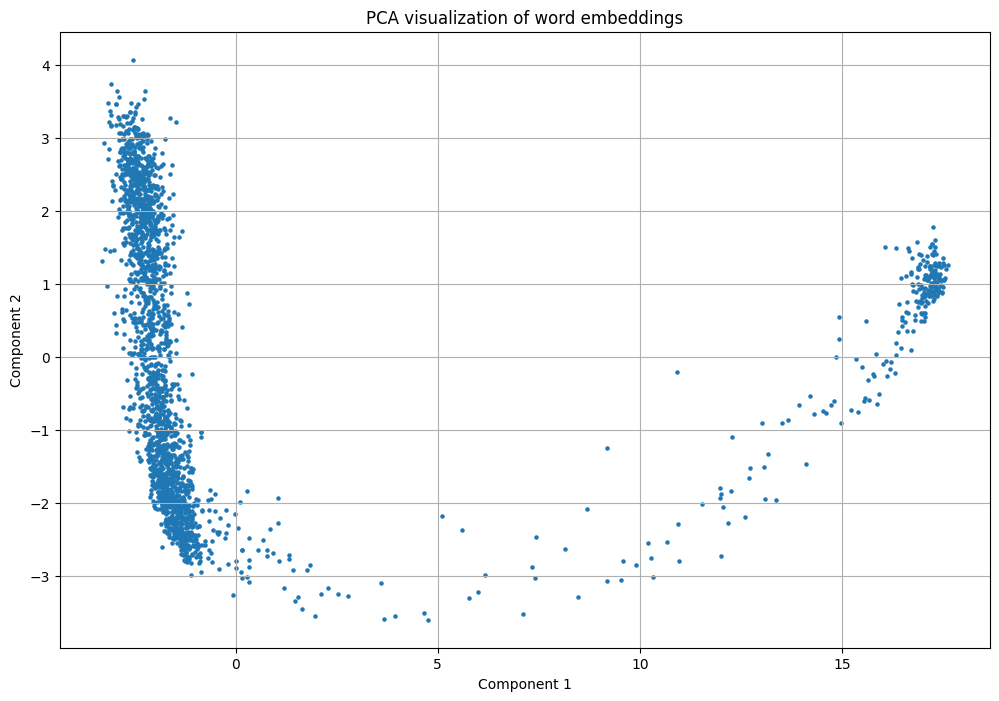

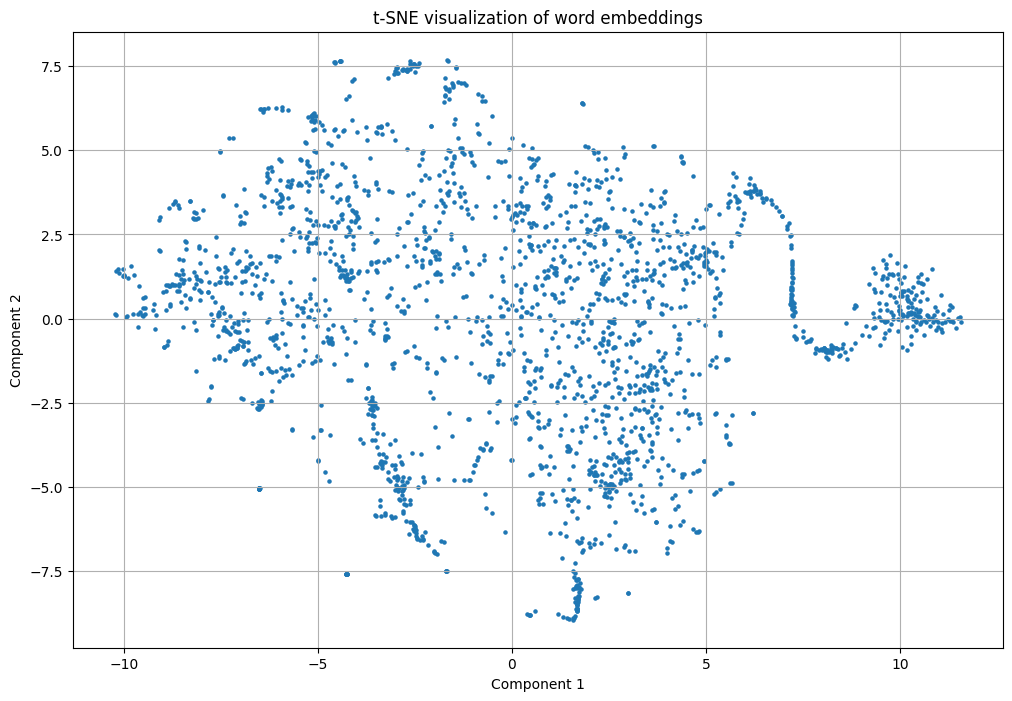

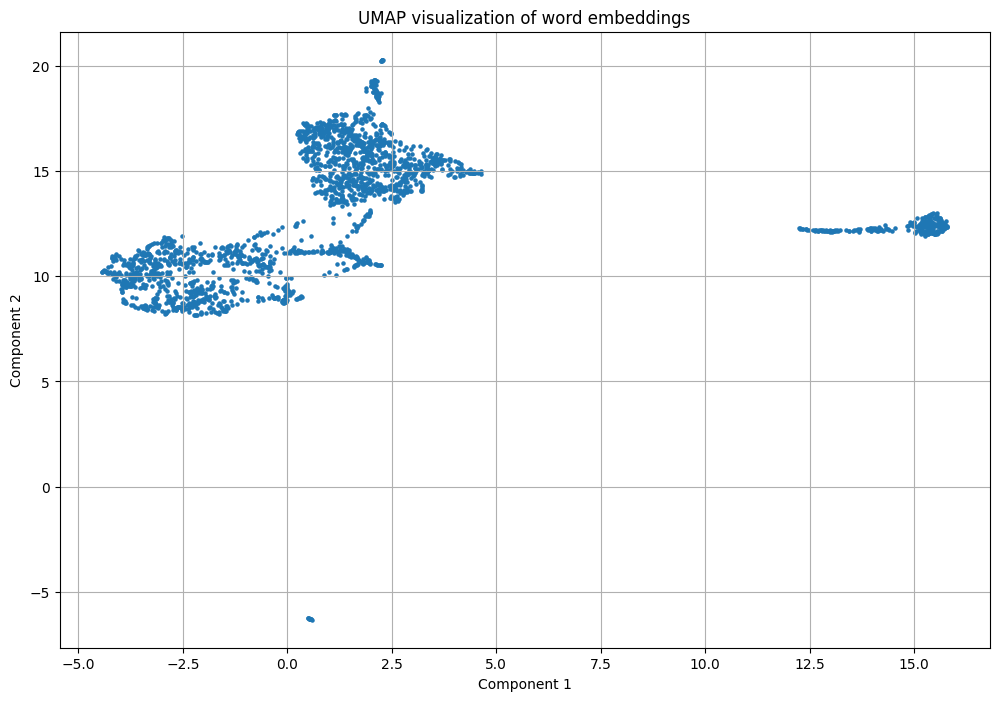

In [10]:
from ipynb.fs.full.vocabulary_builder import Vocabulary
import pickle

vocab_path = 'vocab.pkl'

with open(vocab_path, 'rb') as f:
    vocab = pickle.load(f)
    
tokens = []
for k, v in vocab.word2idx.items():
    if k != "<START>" or k != "<END>" or k != "<PAD>" or k != "<UNK>":
        tokens.append(k)
embeddings = get_word_embeddings(tokens)
plot_embeddings(embeddings)
plot_embeddings(embeddings, method="t-SNE")
plot_embeddings(embeddings, method="UMAP")
    